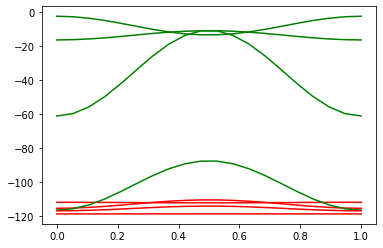

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def x(A, B, A_, B_):
   t = np.linspace(0, 1, 20)
   for i in range(0, len(A)):
      x = A[i] + B[i]*np.cos(2*np.pi*t)
      y = A_[i] + B_[i]*np.cos(2*np.pi*t)
      plt.plot(t, x, 'g-')
      plt.plot(t, y, 'r-')
   plt.show()

x([-7.7983,-35.8252, -102.0838,-13.5181], [5.5215,-25.2821,-14.5396,-2.7364], [-112.1698, -113.0675,-118.8532,-115.6473], [0.1625,-2.485,-0.016,-1.4006])

In [ ]:
# Тут нормализуются макропараметры
""" 
def macroparam_norm(Nmax):
   data_marco = pd.read_csv('data_macro.csv')
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()
   M3 = data_macro['M3'].tolist()
   M4 = data_macro['M4'].tolist()
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   abs_M1, abs_M2, abs_M3, abs_M4, abs_M5, abs_M6, abs_M7, abs_M8 = [], [], [], [], [], [], [], []
   M1_n, M2_n, M3_n, M4_n, M5_n, M6_n, M7_n, M8_n = [], [], [], [], [], [], [], []
   for i in range(0, Nmax):
      abs_M1.append(abs(M1[i]))
      abs_M2.append(abs(M2[i]))
      abs_M3.append(abs(M3[i]))
      abs_M4.append(abs(M4[i]))
      abs_M5.append(abs(M5[i]))
      abs_M6.append(abs(M6[i]))
      abs_M7.append(abs(M7[i]))
      abs_M8.append(abs(M8[i]))
   
   for i in range(0, Nmax):
      M1_n.append(M1[i]/max(abs_M1))
      M2_n.append(M2[i]/max(abs_M2))
      M3_n.append(M3[i]/max(abs_M3)) 
      M4_n.append(M4[i]/max(abs_M4))
      M5_n.append(M5[i]/max(abs_M5))
      M6_n.append(M6[i]/max(abs_M6))
      M7_n.append(M7[i]/max(abs_M7)) 
      M8_n.append(M8[i]/max(abs_M8))

   data_macro_norm = {'M1_norm': M1_n, 'M2_norm': M2_n, 'M3_norm': M3_n, 'M4_norm': M4_n, 'M5_norm': M5_n, 'M6_norm': M6_n, 'M7_norm': M7_n, 'M8_norm': M8_n}
   data = pd.DataFrame(data = data_macro_norm)
   data.to_csv("data_macro_norm.csv")
   return data
print('Подсчитаны нормализованные макропараметры')
data_macro_norm = macroparam_norm(Nmax)
data_macro_norm
 """

In [ ]:
""" # Создание стратегий
def strategy(t, Nmax):
   data = pd.read_csv('data_param_AB.csv')
   Aj = data['A_j'].tolist()
   Bj = data['B_j'].tolist()
   Aa = data['A_a'].tolist()
   Ba = data['B_a'].tolist()
   x_j, x_a = [], []
   for i in range(0, Nmax):
      xj = Aj[i] + Bj[i]*np.cos(2*np.pi*t)
      x_j.append(xj)

      xa = Aa[i] + Ba[i]*np.cos(2*np.pi*t)
      x_a.append(xa)
   strat = [x_j, x_a]
   data_strat = {'x': x_yng,'x': x_old}
   data = pd.DataFrame(data = data_strat)
   data.to_csv("data_strat.csv")
   return x_yng, x_old 

"""

In [1]:
alpha_j = 0.0016
alpha_a = 0.006
betta_j = 0.0000007
betta_a = 0.000000075
gamma_j = 0.00008
gamma_a = 0.004
delta_j = 0.000016
delta_a = 0.00006
sigma1 = 1
sigma2 = 1

D = 120
D0 = 70  

Nmax = 20
import pandas as pd
import numpy as np
# Подсчет макропараметров
def macroparams(Nmax):
   data_strat = pd.read_csv('data_strat.csv')
   Aj = data_strat['A_J'].tolist()
   Bj = data_strat['B_J'].tolist()
   Aa = data_strat['A_A'].tolist()
   Ba = data_strat['B_A'].tolist()
   M1, M2, M3, M4, M5, M6, M7, M8 = [], [], [], [], [], [], [], []
   for i in range(0, Nmax):
      M1.append(round(sigma1*(Aj[i] + D), 5))
      M2.append(round(-sigma2*(Aj[i] + D + Bj[i]/2), 5))
      M3.append(round(-2*(np.pi*Bj[i])**2, 5))
      M4.append(round(-((Aj[i] + D0)**2 + (Bj[i]**2)/2), 5))
      M5.append(round(sigma1*(Aa[i] + D), 5))
      M6.append(round(-sigma2*(Aa[i] + D + Ba[i]/2), 5))
      M7.append(round(-2*(np.pi*Ba[i])**2, 5))
      M8.append(round(-((Aa[i] + D0)**2 + (Ba[i]**2)/2), 5))
   data_macro = {'M1': M1, 'M2': M2, 'M3': M3, 'M4': M4, 'M5': M5, 'M6': M6, 'M7': M7, 'M8': M8}
   data = pd.DataFrame(data = data_macro)
   data.to_csv("data_macro.csv", index=False)
   return M1, M2, M3, M4, M5, M6, M7, M8